## Problem Statement

Analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to thr management team at Walmart team to make the better business decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Loading the dataset

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
# Shape of the dataset -
df.shape

(550068, 10)

In [4]:
# Checking data types -
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [5]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


## 2. Null values & Outliers detection

In [6]:
# Checking for null values -
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There aren't any missing values in the dataset.

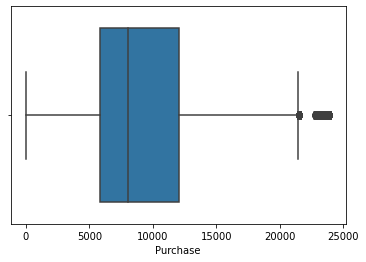

In [19]:
ax = sns.boxplot(x=df["Purchase"])
plt.show()

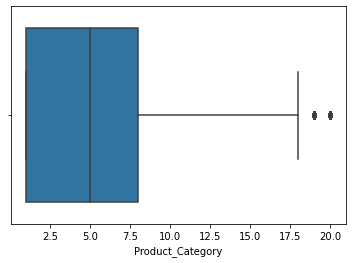

In [20]:
ax = sns.boxplot(x=df["Product_Category"])
plt.show()

In [21]:
df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

## 3.Data Exploration

### a. average spent per transaction by Female

In [58]:
df[(df["Gender"] == 'F')]['Purchase'].sum()/df[(df["Gender"] == 'F')]['Purchase'].count()

8734.565765155476

### b. average spent per transaction by Male

In [59]:
df[(df["Gender"] == 'M')]['Purchase'].sum()/df[(df["Gender"] == 'M')]['Purchase'].count()

9437.526040472265

### c. Inference after computing the average female and male expenses

Male purchases more than Female

### d. An interval within which the population average will lie

In [60]:
# Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=
# bs_means is a list of 'r' bootstrap sample means
r = 10000
femaledf = df[(df["Gender"] == 'F')]['Purchase']
size = 500
female_means = np.empty(r)
for i in range(r):
    female_sample = np.random.choice(femaledf, size=size)
    female_means[i] = np.mean(female_sample)
print(np.percentile(female_means,2.5))
print(np.percentile(female_means,97.5))

8318.59315
9147.412250000001


In [61]:
r = 10000
maledf = df[(df["Gender"] == 'M')]['Purchase']
size = 500
male_means = np.empty(r)
for i in range(r):
    male_sample = np.random.choice(maledf, size=size)
    male_means[i] = np.mean(male_sample)
print(np.percentile(male_means,2.5))
print(np.percentile(male_means,97.5))

8992.8664
9896.5549


## 4. Central limit theorem to compute the interval

### a. Female purchase with 90% CI and Sample size is 500

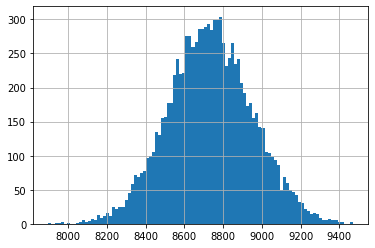

In [27]:
# Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=
# bs_means is a list of 'r' bootstrap sample means
r = 10000
femaleData = df[(df["Gender"] == 'F')]['Purchase']
size = 500
bs_means = np.empty(r)
for i in range(r):
    bs_sample = np.random.choice(femaleData, size=size)
    bs_means[i] = np.mean(bs_sample)
    
import matplotlib.pyplot as plt
plt.figure()
plt.hist(bs_means, bins=100)
plt.grid()
plt.show()

In [28]:
# compute C.I on the mean given that bs_means follows Gaussian distribution: CLT
print(np.mean(bs_means))
print(np.std(bs_means))

8733.1616084
216.71990174806987


In [29]:
print(np.mean(bs_means)-2*np.std(bs_means))
print(np.mean(bs_means)+2*np.std(bs_means))

8299.72180490386
9166.60141189614


In [30]:
# could we just use the 5th percentile and 95th percentile value
print(np.percentile(bs_means,5))
print(np.percentile(bs_means,95))

8376.8537
9094.2087


### b. Female purchase with 95% CI and Sample size is 500

In [32]:
# could we just use the 2.5th percentile and 97.5th percentile value
print(np.percentile(bs_means,2.5))
print(np.percentile(bs_means,97.5))

8316.46205
9166.0389


### c. Female purchase with 99% CI and Sample size is 500

In [42]:
# could we just use the .5th percentile and 99.5th percentile value
print(np.percentile(bs_means,.5))
print(np.percentile(bs_means,99.5))

8174.4184399999995
9288.085529999998


### d. Female purchase with 90% CI and Sample size is 1000

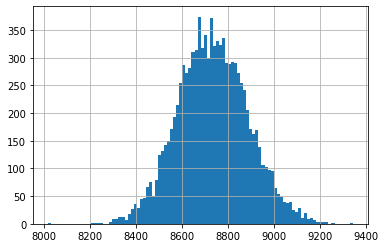

In [37]:
# Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=
# bs_means is a list of 'r' bootstrap sample means
r = 10000
femaleData1 = df[(df["Gender"] == 'F')]['Purchase']
size = 1000
bs_means1 = np.empty(r)
for i in range(r):
    bs_sample1 = np.random.choice(femaleData1, size=size)
    bs_means1[i] = np.mean(bs_sample1)
    
import matplotlib.pyplot as plt
plt.figure()
plt.hist(bs_means1, bins=100)
plt.grid()
plt.show()

In [38]:
# compute C.I on the mean given that bs_means follows Gaussian distribution: CLT
print(np.mean(bs_means1))
print(np.std(bs_means1))

8734.1744088
152.04243867143174


In [39]:
print(np.mean(bs_means1)-2*np.std(bs_means1))
print(np.mean(bs_means1)+2*np.std(bs_means1))

8430.089531457135
9038.259286142864


In [40]:
# could we just use the 5th percentile and 95th percentile value
print(np.percentile(bs_means1,5))
print(np.percentile(bs_means1,95))

8491.35885
8988.3319


### e. Female purchase with 95% CI and Sample size is 1000

In [41]:
# could we just use the 2.5th percentile and 97.5th percentile value
print(np.percentile(bs_means1,2.5))
print(np.percentile(bs_means1,97.5))

8441.423550000001
9039.983875


### f. Female purchase with 99% CI and Sample size is 1000

In [43]:
# could we just use the .5th percentile and 99.5th percentile value
print(np.percentile(bs_means1,.5))
print(np.percentile(bs_means1,99.5))

8349.508985
9134.600709999999


### g. Male purchase with 90% CI and Sample size is 500

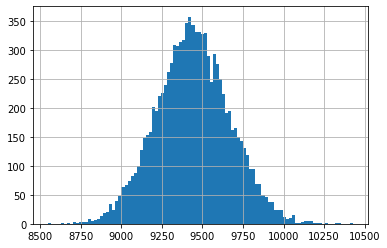

In [44]:
# Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=
# bs_means is a list of 'r' bootstrap sample means
r = 10000
maleData1 = df[(df["Gender"] == 'M')]['Purchase']
size = 500
bs_means2 = np.empty(r)
for i in range(r):
    bs_sample2 = np.random.choice(maleData1, size=size)
    bs_means2[i] = np.mean(bs_sample2)
    
import matplotlib.pyplot as plt
plt.figure()
plt.hist(bs_means2, bins=100)
plt.grid()
plt.show()

In [45]:
# compute C.I on the mean given that bs_means follows Gaussian distribution: CLT
print(np.mean(bs_means2))
print(np.std(bs_means2))

9441.9509252
226.25949273543245


In [46]:
print(np.mean(bs_means2)-2*np.std(bs_means2))
print(np.mean(bs_means2)+2*np.std(bs_means2))

8989.431939729137
9894.469910670865


In [47]:
# could we just use the 5th percentile and 95th percentile value
print(np.percentile(bs_means2,5))
print(np.percentile(bs_means2,95))

9068.2665
9816.294399999999


### h. Male purchase with 95% CI and Sample size is 500

In [48]:
# could we just use the 2.5th percentile and 97.5th percentile value
print(np.percentile(bs_means2,2.5))
print(np.percentile(bs_means2,97.5))

9002.18355
9888.711399999998


### i. Male purchase with 99% CI and Sample size is 500

In [49]:
# could we just use the .5th percentile and 99.5th percentile value
print(np.percentile(bs_means2,.5))
print(np.percentile(bs_means2,99.5))

8878.302950000001
10037.047199999997


### j. Male purchase with 90% CI and Sample size is 1000

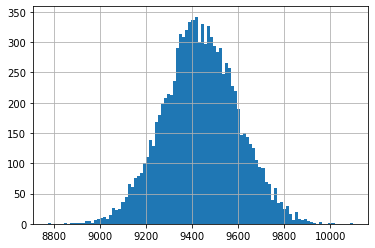

In [50]:
# Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=
# bs_means is a list of 'r' bootstrap sample means
r = 10000
maleData2 = df[(df["Gender"] == 'M')]['Purchase']
size = 1000
bs_means3 = np.empty(r)
for i in range(r):
    bs_sample3 = np.random.choice(maleData2, size=size)
    bs_means3[i] = np.mean(bs_sample3)
    
import matplotlib.pyplot as plt
plt.figure()
plt.hist(bs_means3, bins=100)
plt.grid()
plt.show()

In [51]:
# compute C.I on the mean given that bs_means follows Gaussian distribution: CLT
print(np.mean(bs_means3))
print(np.std(bs_means3))

9437.292143400002
161.3406293489778


In [52]:
print(np.mean(bs_means3)-2*np.std(bs_means3))
print(np.mean(bs_means3)+2*np.std(bs_means3))

9114.610884702046
9759.973402097958


In [53]:
# could we just use the 5th percentile and 95th percentile value
print(np.percentile(bs_means3,5))
print(np.percentile(bs_means3,95))

9170.0223
9705.45105


### k. Male purchase with 95% CI and Sample size is 1000

In [54]:
# could we just use the 2.5th percentile and 97.5th percentile value
print(np.percentile(bs_means3,2.5))
print(np.percentile(bs_means3,97.5))

9123.7821
9757.2015


### l. Male purchase with 99% CI and Sample size is 1000

In [55]:
# could we just use the .5th percentile and 99.5th percentile value
print(np.percentile(bs_means3,.5))
print(np.percentile(bs_means3,99.5))

9022.656055
9850.660555


## observations from CLT interval

* Using CLT observed Male customer purchase more compare with Female
* When Sample size getting increased we will get more closer value
* When CI increases lower & upper limit gets wider

## 5. observations from CLT interval

* Male customer purchase more compare with Female
* When I took 500 samples, there is some level of overlapping between male & female. Also found when CI increases overlap also getting increases
* When sample size increases, overlapping getting decreased

## 6.Agewise

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

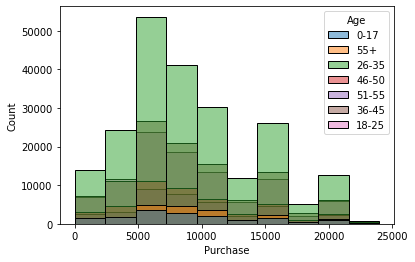

In [69]:
sns.histplot(data=df, x='Purchase', bins=10, hue='Age')

## 7.Recommendations

From the data we can conclude Male purchasing more than Female (there is some level of overlapping, but with 90% CI we can say)
Better business team can concentrate on some offer on Female related product and they can increase the Female purchase capabilities